# Dataset

```
@misc{ankit_2025,
	title={Alzheimer’s Prediction Dataset (Global)},
	url={https://www.kaggle.com/dsv/10618775},
	DOI={10.34740/KAGGLE/DSV/10618775},
	publisher={Kaggle},
	author={Ankit},
	year={2025}
}```

In [1]:
import os
import pandas as pd
import numpy as np

dataset_path = 'data/'  
csv_file = os.path.join(dataset_path, 'alzheimers_prediction_dataset.csv')  
df = pd.read_csv(csv_file)
print(df.head())

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High      

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [3]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Li

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} value counts:\n{df[col].value_counts(normalize=True)}")


Country value counts:
Country
Brazil          0.051681
Germany         0.051250
Australia       0.050981
Russia          0.050860
South Africa    0.050617
Japan           0.050496
India           0.050361
South Korea     0.050240
Argentina       0.050227
Italy           0.050133
Canada          0.049958
France          0.049944
Norway          0.049890
Spain           0.049783
Sweden          0.049661
Saudi Arabia    0.049298
UK              0.049150
USA             0.048679
Mexico          0.048436
China           0.048356
Name: proportion, dtype: float64

Gender value counts:
Gender
Female    0.501447
Male      0.498553
Name: proportion, dtype: float64

Physical Activity Level value counts:
Physical Activity Level
High      0.334572
Low       0.333239
Medium    0.332189
Name: proportion, dtype: float64

Smoking Status value counts:
Smoking Status
Current    0.335406
Never      0.333051
Former     0.331543
Name: proportion, dtype: float64

Alcohol Consumption value counts:
Alcohol Co

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


plt.rcParams.update({
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'axes.titlesize': 14,        
    'axes.labelsize': 12,       
    'xtick.labelsize': 12,       
    'ytick.labelsize': 12,      
    'legend.fontsize': 12,      
    'figure.titlesize': 14,      
    'font.size': 12,            
    'legend.title_fontsize': 12 
})

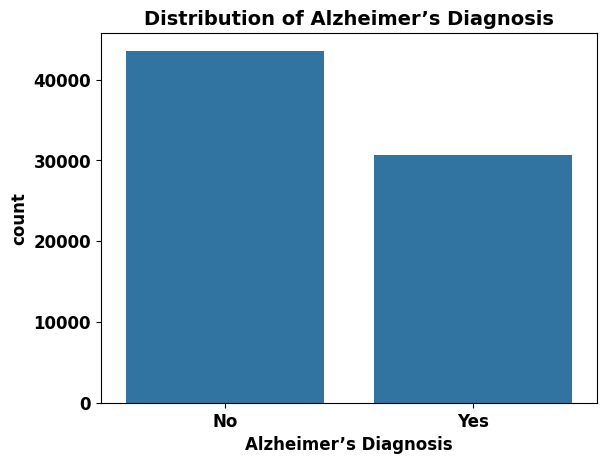

Alzheimer’s Diagnosis
No     0.586541
Yes    0.413459
Name: proportion, dtype: float64


In [7]:
sns.countplot(x='Alzheimer’s Diagnosis', data=df)
plt.title('Distribution of Alzheimer’s Diagnosis')
plt.show()
print(df['Alzheimer’s Diagnosis'].value_counts(normalize=True)) 

Moderate imbalance (58.65% vs 41.35%) but this still warrant some attention in model training, as such I will consider:

- using appropriate evaluation metrics (F1-score, precision-recall, ROC-AUC instead of just accuracy)
- class weights in model
- possibly using stratified sampling in train/test splits

## Univariate Analysis: Distributions of key features related to Alzheimer's

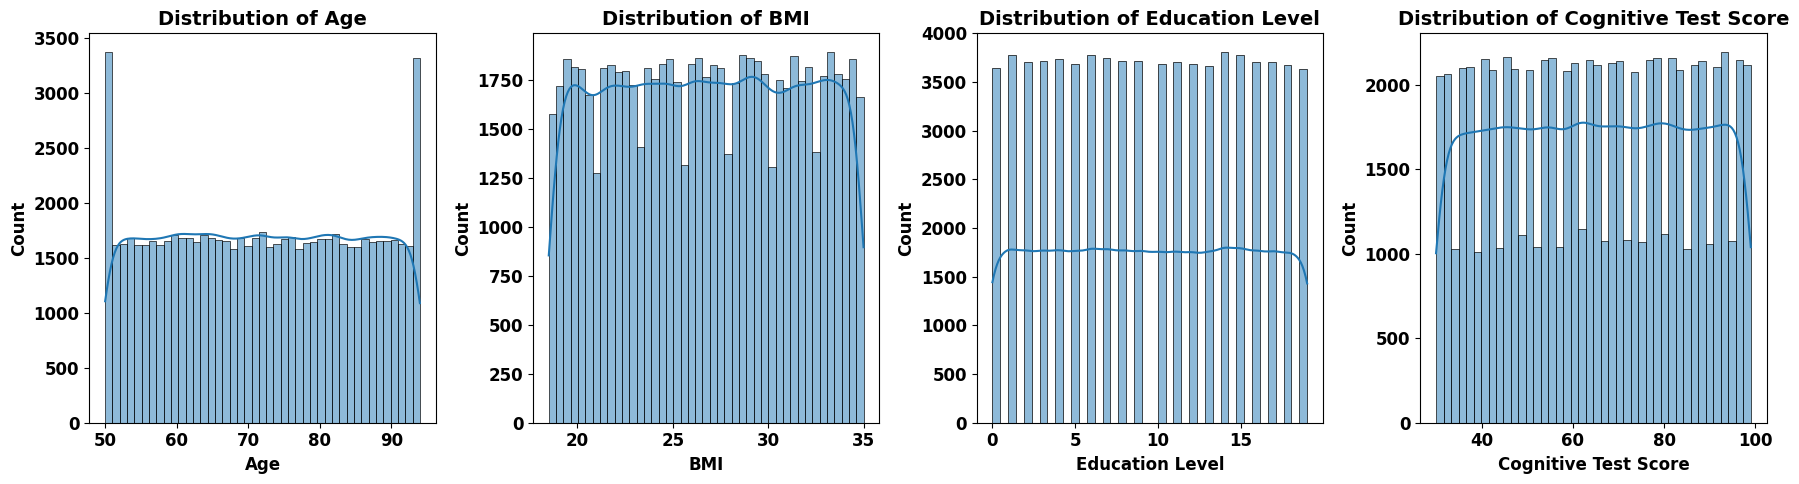

In [8]:
num_cols = ['Age', 'BMI', 'Education Level', 'Cognitive Test Score']
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in categorical_cols if col not in ['Alzheimer’s Diagnosis', 'Country']]
len(cat_cols)

19

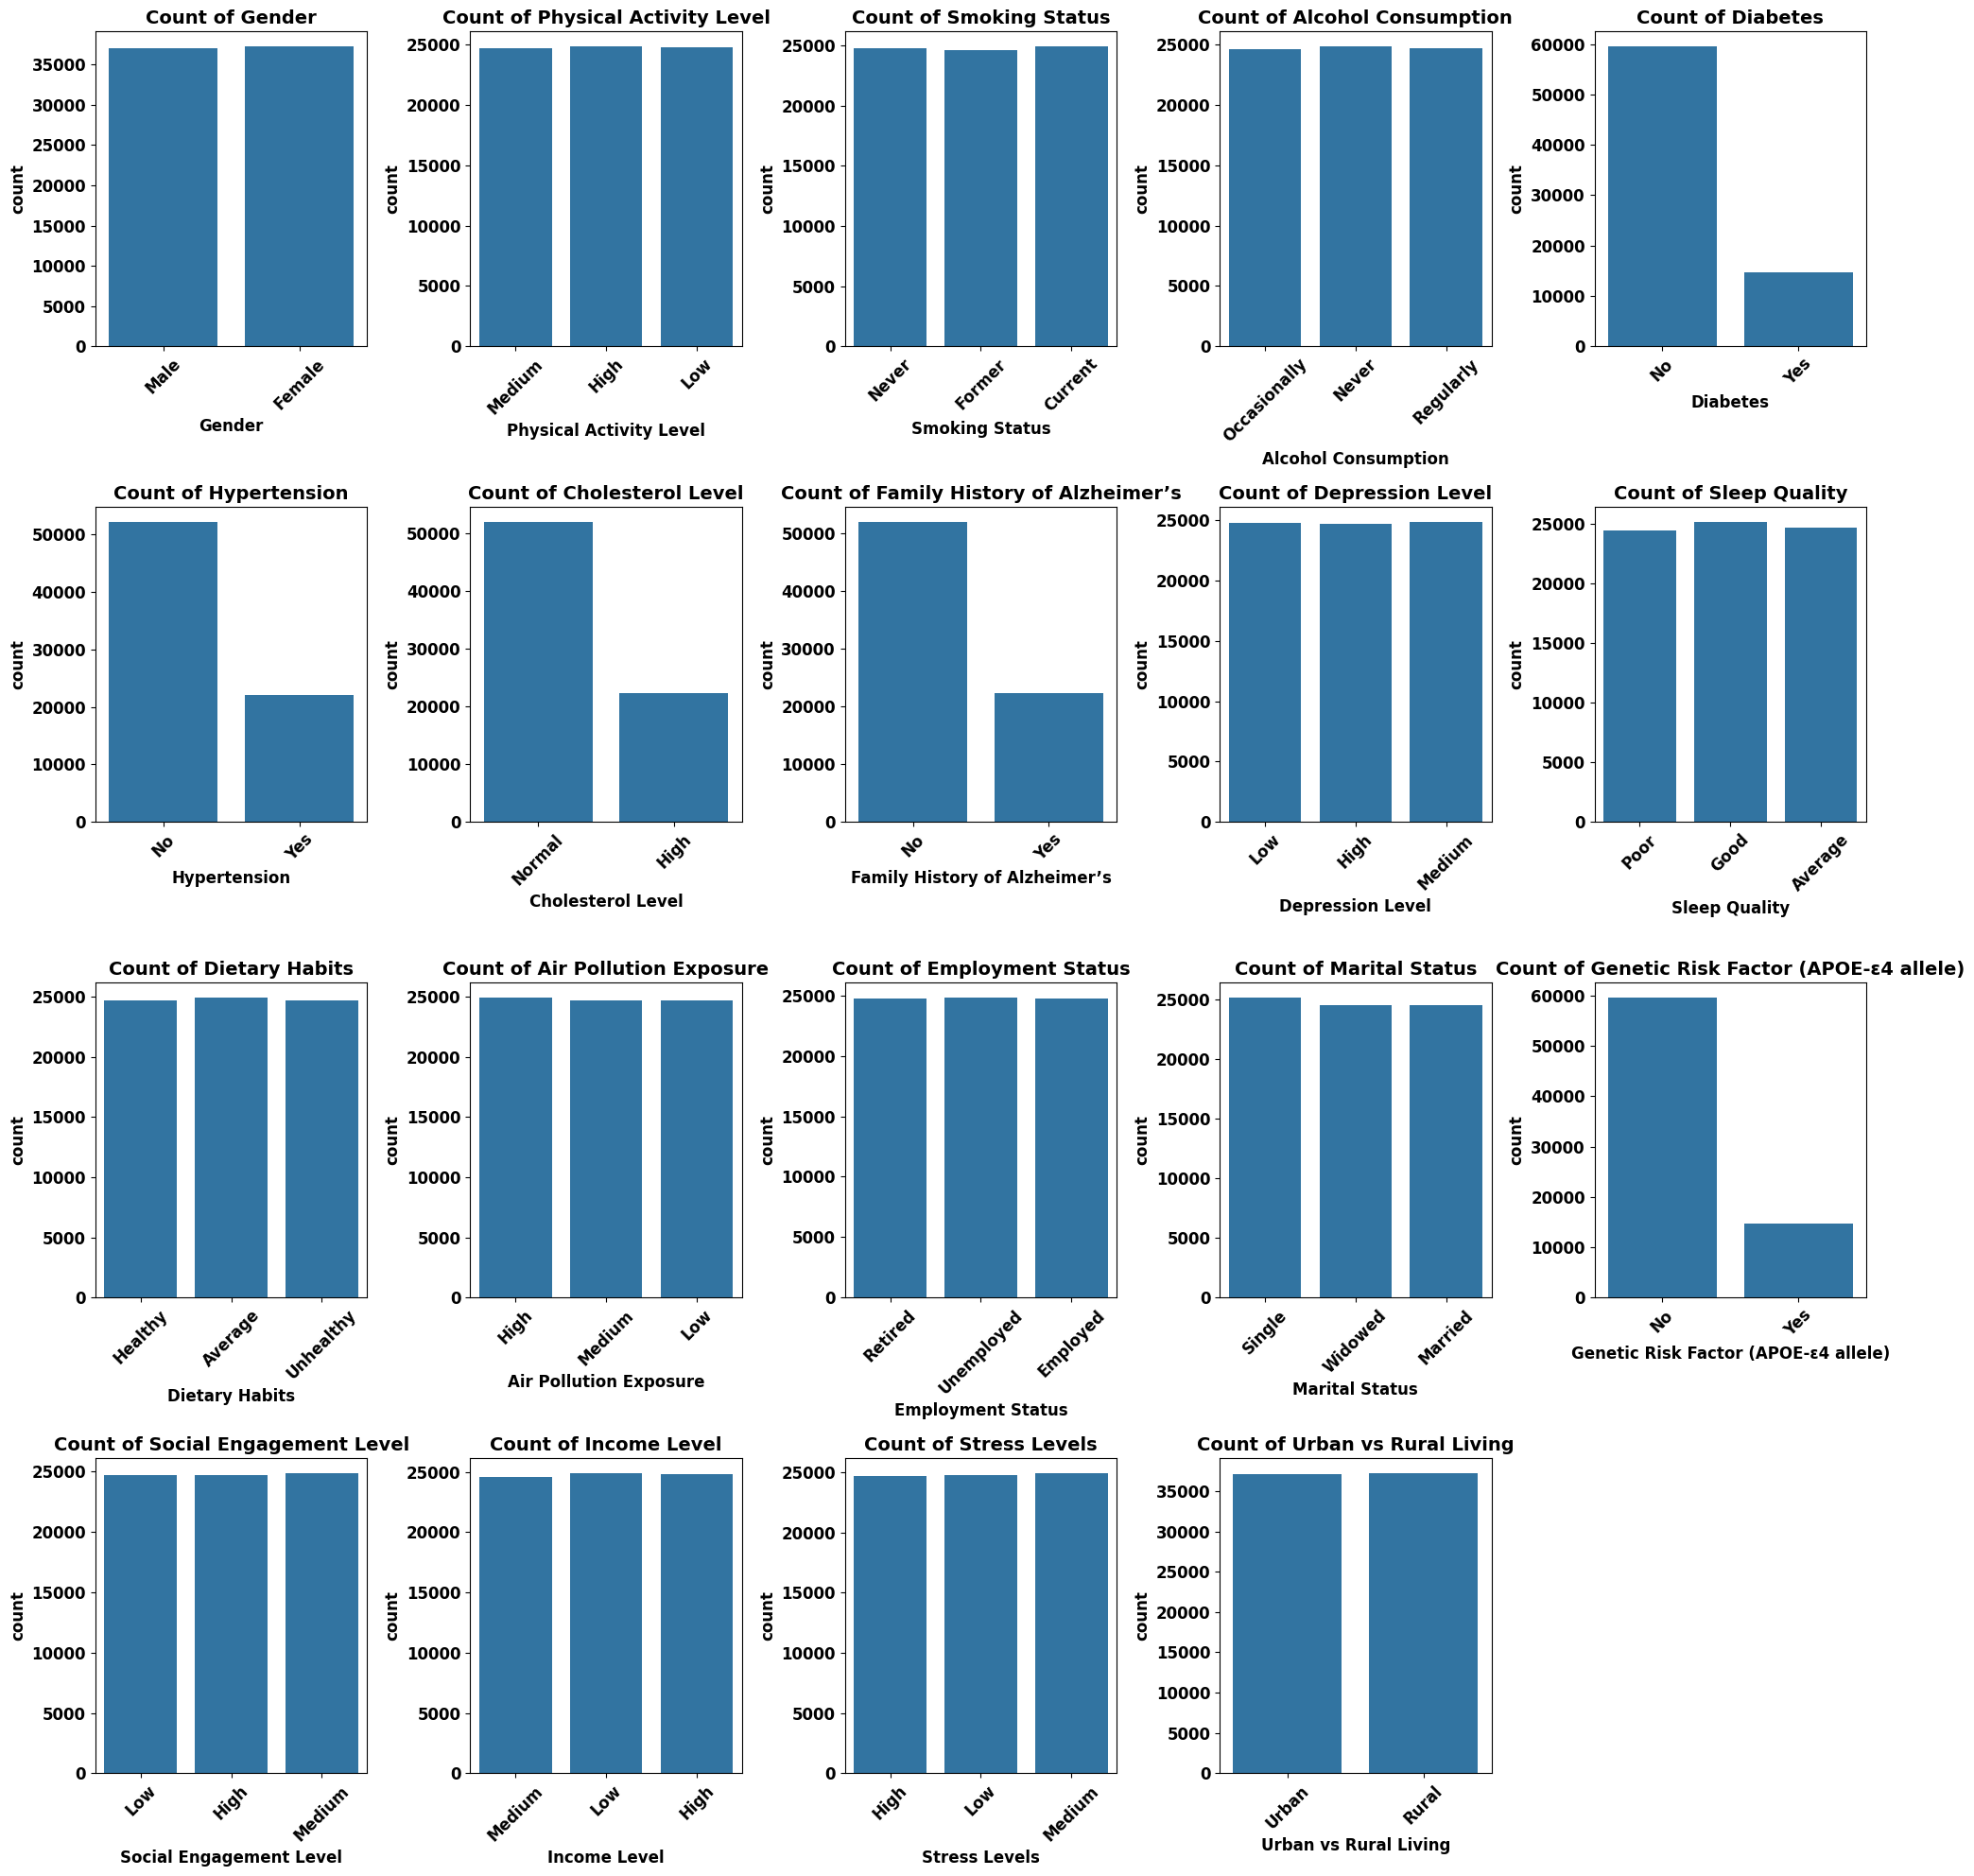

In [10]:
risk_cols = cat_cols.copy() 
fig, axs = plt.subplots(4, 5, figsize=(20, 20))
axs = axs.flatten()  

for i, col in enumerate(risk_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f'Count of {col}')
    axs[i].tick_params(axis='x', rotation=45)

for i in range(len(risk_cols), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()
plt.show()

## Bivariate Analysis: Correlations with Diagnosis to explain risks

Alzheimer’s Diagnosis column is mapped to numeric for correlations: 'No'=0, 'Yes'=1.

                             Age        BMI  Education Level  \
Alzheimer’s Diagnosis                                          
No                     67.388203  26.787450         9.469474   
Yes                    78.457005  26.770976         9.513105   

                       Cognitive Test Score  
Alzheimer’s Diagnosis                        
No                                64.673560  
Yes                               64.626836  

Crosstab for Country:
 Alzheimer’s Diagnosis        No       Yes
Country                                  
Argentina              0.597963  0.402037
Australia              0.597307  0.402693
Brazil                 0.514196  0.485804
Canada                 0.658583  0.341417
China                  0.613586  0.386414
France                 0.599461  0.400539
Germany                0.589178  0.410822
India                  0.496659  0.503341
Italy                  0.606606  0.393394
Japan                  0.660624  0.339376
Mexico                 0.515286

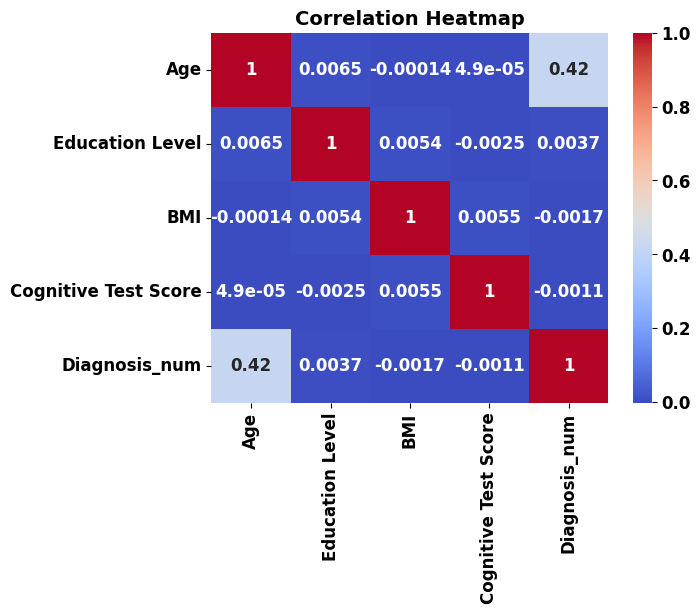

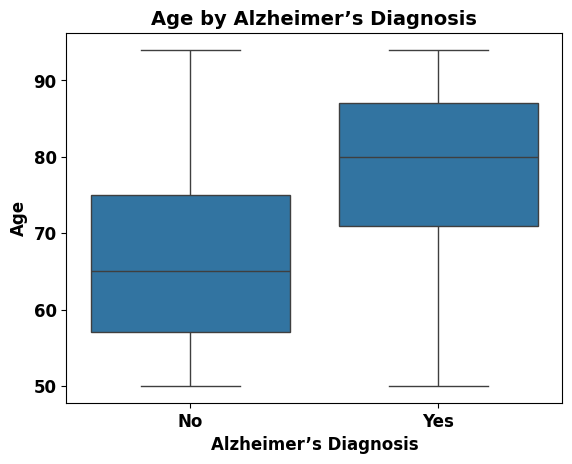

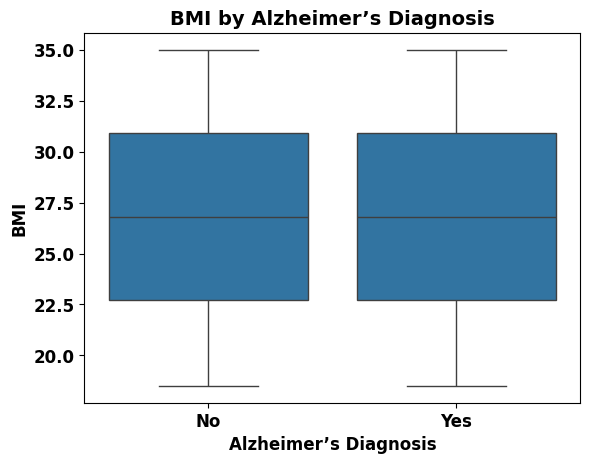

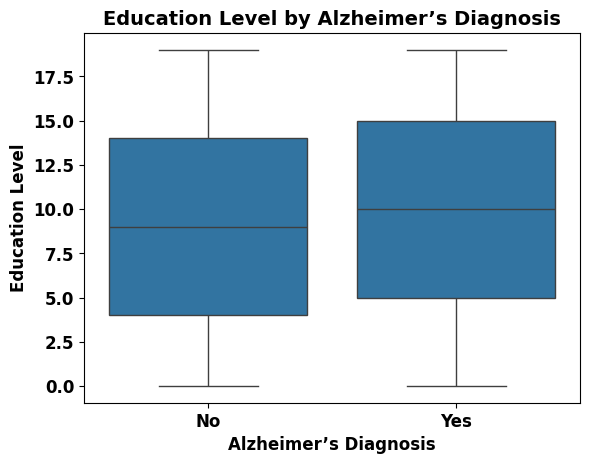

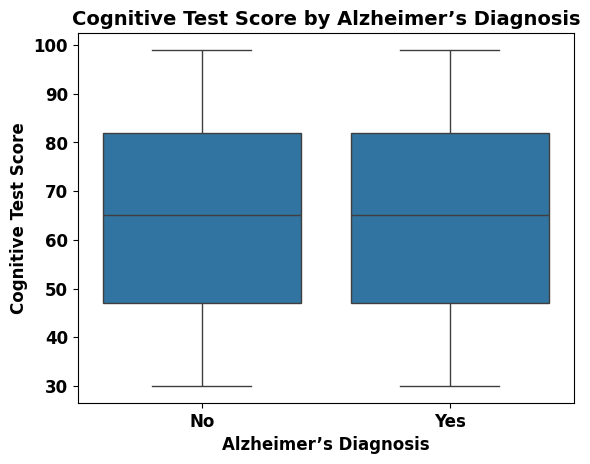

In [11]:
df['Diagnosis_num'] = df['Alzheimer’s Diagnosis'].map({'No': 0, 'Yes': 1})

print(df.groupby('Alzheimer’s Diagnosis')[num_cols].mean()) 

categorical_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in categorical_cols if col not in ['Alzheimer’s Diagnosis']]
risk_cols = cat_cols.copy()
for col in risk_cols:
    print(f"\nCrosstab for {col}:\n {pd.crosstab(df[col], df['Alzheimer’s Diagnosis'], normalize='index')}")

corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


sns.boxplot(x='Alzheimer’s Diagnosis', y='Age', data=df)
plt.title('Age by Alzheimer’s Diagnosis')
plt.show()

sns.boxplot(x='Alzheimer’s Diagnosis', y='BMI', data=df)
plt.title('BMI by Alzheimer’s Diagnosis')
plt.show()

sns.boxplot(x='Alzheimer’s Diagnosis', y='Education Level', data=df)
plt.title('Education Level by Alzheimer’s Diagnosis')
plt.show()

sns.boxplot(x='Alzheimer’s Diagnosis', y='Cognitive Test Score', data=df)
plt.title('Cognitive Test Score by Alzheimer’s Diagnosis')
plt.show()

### 1. Strongest Risk Factors:
- `Age` is highly correlated (positively) to Alzheimer's Diagnosis ==> Age is likely your most predictive feature
    - No Alzheimer's: Mean age = 67.4 years
    - With Alzheimer's: Mean age = 78.5 years
    - 11-year difference! This is the strongest predictor, consistent with known medical literature where age is the #1 risk factor for Alzheimer's.

- `Genetic Risk (APOE-ε4 allele)` 

    - Without APOE-ε4: 36.6% have Alzheimer's
    - With APOE-ε4: 60.6% have Alzheimer's
    - Near doubling of risk - very clinically significant


### 2. Surprising NON-Factors:
- BMI - Virtually identical between groups
    - No: 26.79 vs Yes: 26.77 ==> No meaningful difference

- Education Level - Nearly identical
    - No: 9.47 years vs Yes: 9.51 years ==> This contradicts some studies showing education as protective

- Physical Activity: All levels ~41.5% Alzheimer's

- Smoking: All statuses ~41.2% Alzheimer's

- Diabetes: No (41.4%) vs Yes (41.1%) - almost identical

- Hypertension: No (41.4%) vs Yes (41.3%) - almost identical

- Stress Levels: All levels ~41.1-41.7%

- Urban vs Rural: Rural (41.5%) vs Urban (41.1%)

- Air Pollution: All levels ~41.2-41.7%

# Chi-Square

In [12]:
from scipy.stats import pointbiserialr, chi2_contingency
import pandas as pd
import numpy as np

def feature_test(df, feature, target):
    """Test any feature type against binary target"""
    
    data = df[[feature, target]].dropna()
    
    if data[feature].dtype in ['int64', 'float64']:
        # Point-biserial correlation
        corr, p_val = pointbiserialr(data[feature], data[target])
        test_type = 'Point-biserial'
        statistic = corr
        effect_size = abs(corr)
        
    else:
        # Chi-square
        contingency = pd.crosstab(data[feature], data[target])
        
        if contingency.shape[0] < 2 or contingency.shape[1] < 2:
            return None
        
        chi2, p_val, dof, _ = chi2_contingency(contingency)
        n = contingency.sum().sum()
        
        # Convert to Cramer's V for effect size
        cramer_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
        test_type = 'Chi-square'
        statistic = chi2
        effect_size = cramer_v
    
    return {
        'Feature': feature,
        'Test': test_type,
        'Statistic': statistic,
        'P-value': p_val,
        'Effect_Size': effect_size,
        'Type': 'Numerical' if data[feature].dtype in ['int64', 'float64'] else 'Categorical'
    }

def get_significance(p_value):
    """Determine significance level based on p-value"""
    if p_value < 0.001:
        return 'Extremely Significant'
    elif p_value < 0.01:
        return 'Very Significant'
    elif p_value < 0.05:
        return 'Significant'
    elif p_value < 0.1:
        return 'Marginally Significant'
    else:
        return 'Not Significant'


In [14]:
all_features = num_cols + [col for col in categorical_cols if col != 'Alzheimer’s Diagnosis']
results = []

for feature in all_features:
    result = feature_test(df, feature, 'Diagnosis_num')
    if result:
        results.append(result)

results_df = pd.DataFrame(results).sort_values('P-value')
results_df['Significance_Level'] = results_df['P-value'].apply(get_significance)
results_df.to_csv('results/feature_analysis_results_pvalue.csv', index=False)
print("Results written to results/feature_analysis_results_pvalue.csv")


Results written to results/feature_analysis_results_pvalue.csv


In [15]:
results_df

,Feature,Test,Statistic,P-value,Effect_Size,Type,Significance_Level
0,Age,Point-biserial,0.419923,0.000000e+00,0.419923,Numerical,Extremely Significant
19,Genetic Risk Factor (APOE-ε4 allele),Chi-square,2808.696600,0.000000e+00,0.194450,Categorical,Extremely Significant
12,Family History of Alzheimer’s,Chi-square,1473.779579,0.000000e+00,0.140855,Categorical,Extremely Significant
4,Country,Chi-square,856.499633,2.065222e-169,0.107379,Categorical,Extremely Significant
21,Income Level,Chi-square,3.599813,1.653144e-01,0.006961,Categorical,Not Significant
23,Urban vs Rural Living,Chi-square,1.234796,2.664763e-01,0.004077,Categorical,Not Significant
17,Employment Status,Chi-square,2.574306,2.760556e-01,0.005887,Categorical,Not Significant
8,Alcohol Consumption,Chi-square,2.533317,2.817715e-01,0.005840,Categorical,Not Significant
2,Education Level,Point-biserial,0.003732,3.090624e-01,0.003732,Numerical,Not Significant
22,Stress Levels,Chi-square,2.041804,3.602698e-01,0.005243,Categorical,Not Significant


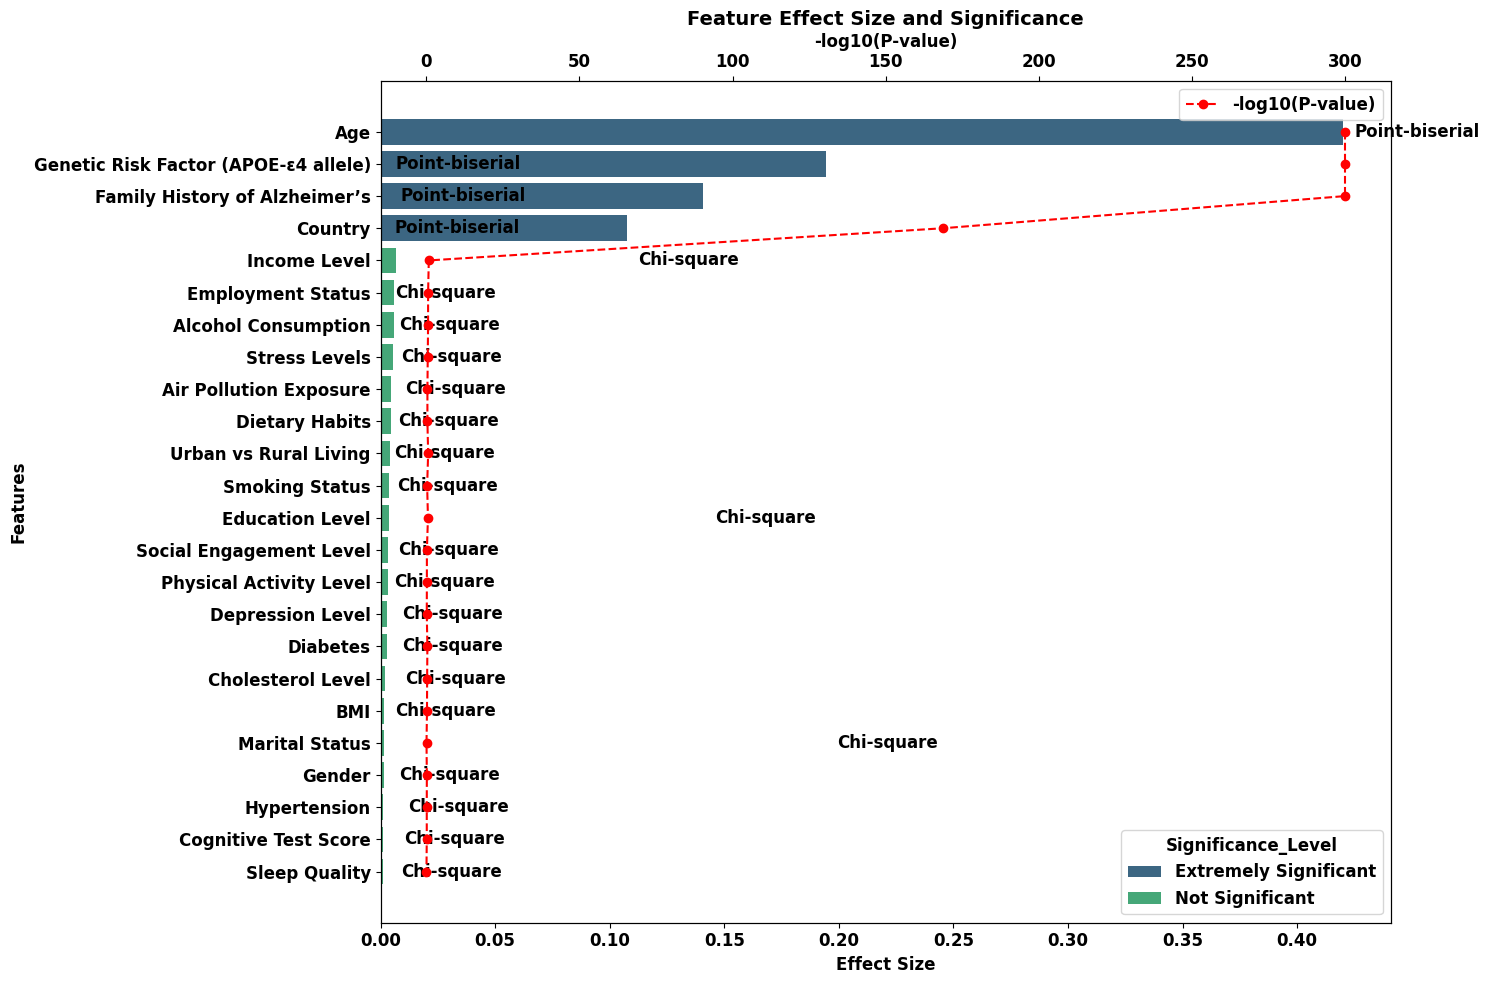

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plot_df = results_df.copy()
plot_df = plot_df.sort_values('Effect_Size', ascending=False)
plot_df['-log10(P)'] = -np.log10(plot_df['P-value'].clip(lower=1e-300))

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.barplot(data=plot_df, y='Feature', x='Effect_Size', hue='Significance_Level', 
            palette='viridis', dodge=False, ax=ax1)
ax1.set_title('Feature Effect Size and Significance')
ax1.set_xlabel('Effect Size')
ax1.set_ylabel('Features')

ax2 = ax1.twiny()
ax2.plot(plot_df['-log10(P)'], plot_df['Feature'], 'r--', marker='o', label='-log10(P-value)')
ax2.set_xlabel('-log10(P-value)')
ax2.legend(loc='upper right')

for i, row in plot_df.iterrows():
    ax1.text(row['Effect_Size'] + 0.005, i, row['Test'], va='center')

plt.tight_layout()
plt.show()

**key predictive features are:**
1. **Age** (continuous, strongest effect)
2. **APOE-ε4 allele** (categorical)
3. **Family History** (categorical)
4. **Country** (major confounding/stratifying variable)

- How was data collected? **Webscraping by Ankit** `(https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global)`
- Is Country a proxy for something else? **Not sure**


## Country distribution and Alzheimer's rates by country

Country Summary (sorted by Alzheimer's rate):
              total_count  alz_rate   mean_age
Country                                       
Russia               3778  0.504500  71.677343
India                3741  0.503341  71.836407
South Africa         3760  0.495213  72.320479
Brazil               3839  0.485804  71.992967
Mexico               3598  0.484714  72.074764
South Korea          3732  0.415863  72.334405
Saudi Arabia         3662  0.414255  72.208902
Germany              3807  0.410822  71.908327
UK                   3651  0.403725  71.808272
Australia            3787  0.402693  71.782942
Argentina            3731  0.402037  72.065934
France               3710  0.400539  71.896226
Spain                3698  0.399946  71.761763
Italy                3724  0.393394  72.048335
USA                  3616  0.388551  72.281250
China                3592  0.386414  71.694878
Norway               3706  0.349703  71.974366
Sweden               3689  0.342098  72.016807
Canada        

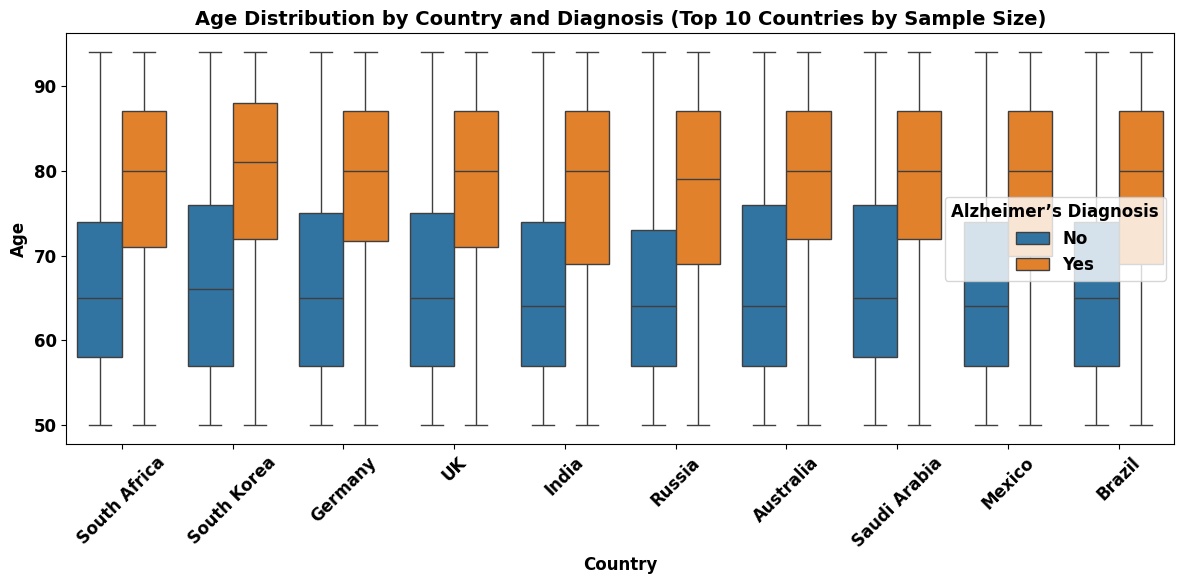

In [42]:

country_summary = df.groupby('Country').agg(
    total_count=('Alzheimer’s Diagnosis', 'count'),
    alz_rate=('Diagnosis_num', 'mean'),
    mean_age=('Age', 'mean')
).sort_values('alz_rate', ascending=False)

print("Country Summary (sorted by Alzheimer's rate):")
print(country_summary)
print(f"\nTotal countries: {len(country_summary)}")

plt.figure(figsize=(12, 6))
top_countries = country_summary.head(10).index
country_subset = df[df['Country'].isin(top_countries)]

sns.boxplot(x='Country', y='Age', hue='Alzheimer’s Diagnosis', data=country_subset)
plt.xticks(rotation=45)
plt.title('Age Distribution by Country and Diagnosis (Top 10 Countries by Sample Size)')
plt.tight_layout()
plt.show()

## Country-Stratified Risk Factor Analysis

In [47]:
def analyze_country(country_name, alpha=0.05):
    country_df = df[df['Country'] == country_name]
    
    # Skip very small samples
    if len(country_df) < 30:  
        return None
    
    print(f"\nAnalysis for: {country_name}")
    print(f"Sample size: {len(country_df)}")
    print(f"Alzheimer's rate: {country_df['Diagnosis_num'].mean():.2%}")
    
    # Age difference
    age_no = country_df[country_df['Diagnosis_num'] == 0]['Age'].mean()
    age_yes = country_df[country_df['Diagnosis_num'] == 1]['Age'].mean()
    print(f"Mean Age - No: {age_no:.1f}, Yes: {age_yes:.1f}, Diff: {age_yes-age_no:.1f}")
    
    # APOE-ε4 rates
    if 'Genetic Risk Factor (APOE-ε4 allele)' in country_df.columns:
        genetic_ct = pd.crosstab(country_df['Genetic Risk Factor (APOE-ε4 allele)'], 
                                country_df['Alzheimer’s Diagnosis'])
        if genetic_ct.shape == (2, 2): 
            chi2, p, _, _ = chi2_contingency(genetic_ct)
            print(f"APOE-ε4 p-value: {p:.10f} {'*' if p < alpha else ''}")
    
    return country_df


In [48]:
top_n_countries = country_summary.index
country_results = {}
for country in top_n_countries:
    result = analyze_country(country)
    if result is not None:
        country_results[country] = result


Analysis for: Russia
Sample size: 3778
Alzheimer's rate: 50.45%
Mean Age - No: 66.1, Yes: 77.2, Diff: 11.1
APOE-ε4 p-value: 0.0000000000 *

Analysis for: India
Sample size: 3741
Alzheimer's rate: 50.33%
Mean Age - No: 66.5, Yes: 77.1, Diff: 10.7
APOE-ε4 p-value: 0.0000000000 *

Analysis for: South Africa
Sample size: 3760
Alzheimer's rate: 49.52%
Mean Age - No: 66.9, Yes: 77.8, Diff: 10.9
APOE-ε4 p-value: 0.0000000000 *

Analysis for: Brazil
Sample size: 3839
Alzheimer's rate: 48.58%
Mean Age - No: 66.8, Yes: 77.5, Diff: 10.8
APOE-ε4 p-value: 0.0000000000 *

Analysis for: Mexico
Sample size: 3598
Alzheimer's rate: 48.47%
Mean Age - No: 66.8, Yes: 77.7, Diff: 10.9
APOE-ε4 p-value: 0.0000000000 *

Analysis for: South Korea
Sample size: 3732
Alzheimer's rate: 41.59%
Mean Age - No: 67.6, Yes: 79.0, Diff: 11.4
APOE-ε4 p-value: 0.0000000000 *

Analysis for: Saudi Arabia
Sample size: 3662
Alzheimer's rate: 41.43%
Mean Age - No: 67.7, Yes: 78.6, Diff: 10.9
APOE-ε4 p-value: 0.0000000000 *

Ana

## Age × Genetics interaction and Country × Age interaction

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def test_all_risk_factors_bycountry(country_df, country_name, num_cols, cat_cols, min_sample=20):
    """Test all risk factors in a specific country"""
    
    results = {'Country': country_name, 'Sample_Size': len(country_df)}
    
    results['Alz_Rate'] = country_df['Diagnosis_num'].mean()
    
    continuous_vars = num_cols.copy()
    for var in continuous_vars:
        if var in country_df.columns:
            no_alz = country_df[country_df['Diagnosis_num'] == 0][var].dropna()
            yes_alz = country_df[country_df['Diagnosis_num'] == 1][var].dropna()
            
            if len(no_alz) >= min_sample and len(yes_alz) >= min_sample:
                t_stat, p_value = ttest_ind(no_alz, yes_alz, equal_var=False)
                mean_diff = yes_alz.mean() - no_alz.mean()
                results[f'{var}_p'] = p_value
                results[f'{var}_diff'] = mean_diff
                results[f'{var}_sig'] = p_value < 0.05
            else:
                results[f'{var}_p'] = np.nan
                results[f'{var}_diff'] = np.nan
                results[f'{var}_sig'] = False
    
    categorical_vars = cat_cols.copy()
    
    for var in categorical_vars:
        if var in country_df.columns:
            contingency = pd.crosstab(country_df[var], country_df['Alzheimer’s Diagnosis'])
            
            if contingency.size > 0 and contingency.sum().sum() >= min_sample*2:
                try:
                    chi2, p_value, _, _ = chi2_contingency(contingency)
                    results[f'{var}_p'] = p_value
                    results[f'{var}_sig'] = p_value < 0.05
                    
                    # Calculate odds ratio for binary variables
                    if contingency.shape == (2, 2):
                        a, b = contingency.iloc[0, 0], contingency.iloc[0, 1]
                        c, d = contingency.iloc[1, 0], contingency.iloc[1, 1]
                        or_ = (a * d) / (b * c) if (b * c) != 0 else np.nan
                        results[f'{var}_OR'] = or_
                except:
                    results[f'{var}_p'] = np.nan
                    results[f'{var}_sig'] = False
            else:
                results[f'{var}_p'] = np.nan
                results[f'{var}_sig'] = False
    
    return results

In [64]:
cat_cols = [col for col in categorical_cols if col not in ['Alzheimer’s Diagnosis', 'Country']]
cat_cols

['Gender',
 'Physical Activity Level',
 'Smoking Status',
 'Alcohol Consumption',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Employment Status',
 'Marital Status',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living']

In [65]:
num_cols

['Age', 'BMI', 'Education Level', 'Cognitive Test Score']

In [69]:

all_country_results = []
min_country_sample = 100 

for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    if len(country_df) >= min_country_sample:
        country_results = test_all_risk_factors_bycountry(country_df, country, num_cols, cat_cols, min_sample=min_country_sample)
        all_country_results.append(country_results)

country_analysis_df = pd.DataFrame(all_country_results)

print(f"Analyzed {len(country_analysis_df)} countries with >= {min_country_sample} samples")
print(f"Average Alzheimer's rate across analyzed countries: {country_analysis_df['Alz_Rate'].mean():.2%}")

Analyzed 20 countries with >= 100 samples
Average Alzheimer's rate across analyzed countries: 41.32%


In [68]:
country_analysis_df

,Country,Sample_Size,Alz_Rate,Age_p,Age_diff,Age_sig,BMI_p,BMI_diff,BMI_sig,Education Level_p,...,Genetic Risk Factor (APOE-ε4 allele)_OR,Social Engagement Level_p,Social Engagement Level_sig,Income Level_p,Income Level_sig,Stress Levels_p,Stress Levels_sig,Urban vs Rural Living_p,Urban vs Rural Living_sig,Urban vs Rural Living_OR
0,Spain,3698,0.399946,2.881967e-175,11.447416,True,0.323059,-0.158700,False,0.834012,...,2.622085,0.816122,False,0.437806,False,0.334322,False,0.170761,False,0.910053
1,Argentina,3731,0.402037,1.506222e-186,11.896052,True,0.605297,0.081450,False,0.490786,...,2.621219,0.445696,False,0.288703,False,0.500569,False,0.687046,False,0.971280
2,South Africa,3760,0.495213,1.405688e-160,10.872559,True,0.616488,0.077686,False,0.212545,...,2.596285,0.971752,False,0.036872,True,0.938371,False,0.279789,False,0.929931
3,China,3592,0.386414,1.051303e-158,11.209336,True,0.400707,-0.137298,False,0.197164,...,2.708103,0.823422,False,0.862545,False,0.307636,False,0.785155,False,1.021254
4,Sweden,3689,0.342098,1.413112e-176,11.482729,True,0.524045,0.104262,False,0.822033,...,2.960451,0.914541,False,0.005359,True,0.852158,False,0.580578,False,1.041605
5,South Korea,3732,0.415863,4.869151e-171,11.353651,True,0.263715,-0.175293,False,0.342568,...,2.796155,0.097804,False,0.115890,False,0.953552,False,0.587201,False,1.039012
6,Germany,3807,0.410822,3.852794e-165,11.088078,True,0.769857,0.045722,False,0.154784,...,2.946043,0.383567,False,0.684746,False,0.991309,False,0.857695,False,0.986112
7,UK,3651,0.403725,4.285960e-161,11.120154,True,0.189713,0.210764,False,0.966091,...,2.234637,0.568388,False,0.923707,False,0.125059,False,0.341306,False,1.068737
8,Canada,3711,0.341417,7.636201e-175,11.775242,True,0.225541,-0.199760,False,0.901199,...,2.471970,0.170140,False,0.520268,False,0.779030,False,0.847173,False,0.984376
9,India,3741,0.503341,5.690660e-155,10.688577,True,0.094152,-0.262807,False,0.434577,...,2.726372,0.545533,False,0.507476,False,0.681623,False,0.703373,False,1.027412


## Identify Countries with Significant Non-Genetic Factors

In [75]:
# Find countries where non-genetic factors are significant
significant_findings = []

# List of non-genetic factors to check
non_genetic_factors = [
    ('BMI', 'BMI_sig'),
    ('Education Level', 'Education Level_sig'),
    ('Physical Activity Level', 'Physical Activity Level_sig'),
    ('Social Engagement Level', 'Social Engagement Level_sig'),
    ('Smoking Status', 'Smoking Status_sig'),
    ('Diabetes', 'Diabetes_sig'),
    ('Hypertension', 'Hypertension_sig'),
    ('Cholesterol Level', 'Cholesterol Level_sig'),
    ('Sleep Quality', 'Sleep Quality_sig'),
    ('Stress Levels', 'Stress Levels_sig'),
    ('Dietary Habits', 'Dietary Habits_sig'),
    ('Air Pollution Exposure', 'Air Pollution Exposure_sig'),
    ('Employment Status', 'Employment Status_sig'),
    ('Marital Status', 'Marital Status_sig'),
    ('Income Level', 'Income Level_sig'),
    ('Urban vs Rural Living', 'Urban vs Rural Living_sig')
]

print("Countries with significant non-genetic risk factors:")
print("=" * 52)

for _, row in country_analysis_df.iterrows():
    country_sig_factors = []
    
    # check each non-genetic factor
    for factor_name, sig_col in non_genetic_factors:
        if sig_col in row and row[sig_col] == True:
            # Get p-value and effect size
            p_col = sig_col.replace('_sig', '_p')
            diff_col = sig_col.replace('_sig', '_diff')
            
            p_value = row.get(p_col, np.nan)
            effect_size = row.get(diff_col, np.nan) if diff_col in row else None
            
            country_sig_factors.append(f"{factor_name} (p={p_value:.4f})")
    
    if country_sig_factors:
        print(f"\n{row['Country']} (n={row['Sample_Size']}, Alz Rate={row['Alz_Rate']:.2%}):")
        for factor in country_sig_factors:
            print(f"  - {factor}")
        significant_findings.append({
            'Country': row['Country'],
            'Factors': country_sig_factors,
            'Sample_Size': row['Sample_Size'],
            'Alz_Rate': row['Alz_Rate']
        })

if not significant_findings:
    print("\nNo countries showed significant non-genetic factors at p<0.05")

Countries with significant non-genetic risk factors:

South Africa (n=3760, Alz Rate=49.52%):
  - Hypertension (p=0.0097)
  - Income Level (p=0.0369)

Sweden (n=3689, Alz Rate=34.21%):
  - Income Level (p=0.0054)

Germany (n=3807, Alz Rate=41.08%):
  - Physical Activity Level (p=0.0330)
  - Dietary Habits (p=0.0496)

Russia (n=3778, Alz Rate=50.45%):
  - BMI (p=0.0017)
  - Stress Levels (p=0.0197)

Japan (n=3751, Alz Rate=33.94%):
  - Smoking Status (p=0.0068)
  - Urban vs Rural Living (p=0.0200)

Brazil (n=3839, Alz Rate=48.58%):
  - Diabetes (p=0.0195)
  - Stress Levels (p=0.0069)


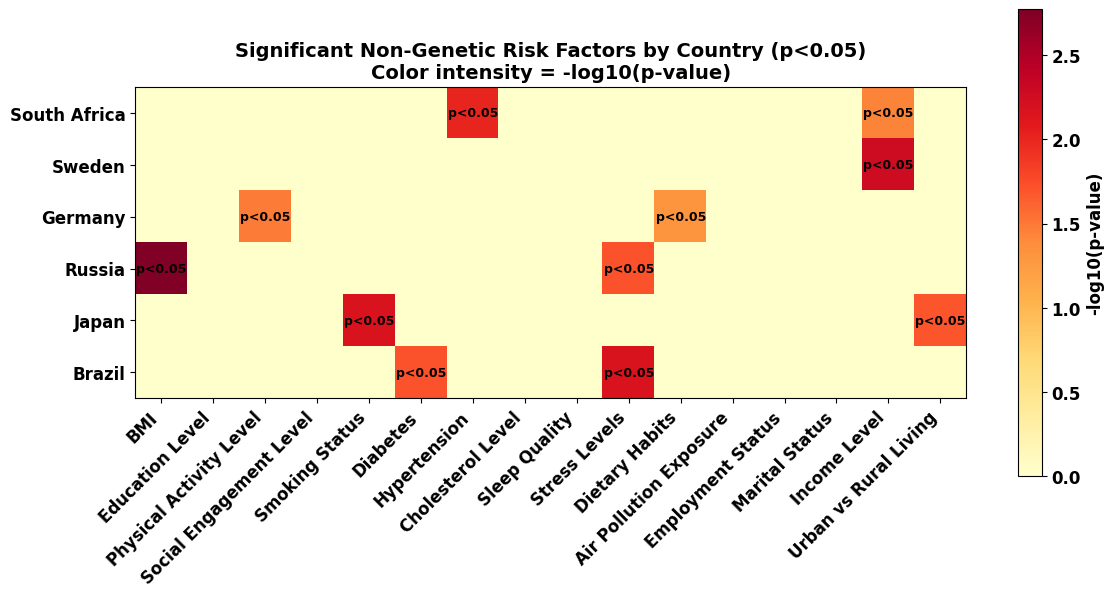

In [77]:
if significant_findings:
    sig_matrix = []
    countries_with_sig = []
    
    for finding in significant_findings:
        country = finding['Country']
        countries_with_sig.append(country)
        
        row_data = []
        for factor_name, _ in non_genetic_factors:
            sig_col = f"{factor_name}_sig"
            p_col = f"{factor_name}_p"
            
            country_row = country_analysis_df[country_analysis_df['Country'] == country].iloc[0]
            
            if sig_col in country_row and country_row[sig_col]:
                p_val = country_row.get(p_col, 1.0)
                if p_val > 0:
                    row_data.append(-np.log10(p_val))
                else:
                    row_data.append(5)  # Cap at 5 for p ≈ 0
            else:
                row_data.append(0)
        
        sig_matrix.append(row_data)
    
    if sig_matrix:
        fig, ax = plt.subplots(figsize=(12, 6))

        im = ax.imshow(sig_matrix, cmap='YlOrRd')
        
        ax.set_xticks(np.arange(len(non_genetic_factors)))
        ax.set_xticklabels([f[0] for f in non_genetic_factors], rotation=45, ha='right')
        ax.set_yticks(np.arange(len(countries_with_sig)))
        ax.set_yticklabels(countries_with_sig)
        
        for i in range(len(countries_with_sig)):
            for j in range(len(non_genetic_factors)):
                if sig_matrix[i][j] > 0:
                    text = ax.text(j, i, f"p<0.05",
                                  ha="center", va="center", color="black", fontsize=9)
        
        ax.set_title(f"Significant Non-Genetic Risk Factors by Country (p<0.05)\n"
                    f"Color intensity = -log10(p-value)")
        plt.colorbar(im, ax=ax, label='-log10(p-value)')
        plt.tight_layout()
        plt.show()

In [78]:
print("SUMMARY STATISTICS ACROSS COUNTRIES")
print("=" * 60)

factors_to_check = [
    ('Age', 'Age_p'),
    ('BMI', 'BMI_p'),
    ('Education', 'Education Level_p'),
    ('Physical Activity', 'Physical Activity Level_p'),
    ('Diabetes', 'Diabetes_p'),
    ('Gender','Gender_p'), 
    ('Smoking Status', 'Smoking Status_p'), 
    ('Alcohol Consumption', 'Alcohol Consumption_p'),
    ('Hypertension', 'Hypertension_p'),
    ('Cholesterol Level', 'Cholesterol Level_p'),
    ('Family History of Alzheimer’s', 'Family History of Alzheimer’s_p'),
    ('Cognitive Test Score', 'Cognitive Test Score_p'),
    ('Depression Level', 'Depression Level_p'),
    ('Sleep Quality', 'Sleep Quality_p'),
    ('Dietary Habits', 'Dietary Habits_p'),
    ('Employment Status', 'Employment Status_p'),
    ('Marital Status', 'Marital Status_p'),
    ('Genetic Risk Factor (APOE-ε4 allele)', 'Genetic Risk Factor (APOE-ε4 allele)_p'),
    ('Social Engagement Level', 'Social Engagement Level_p'),
    ('Income Level', 'Income Level_p'),
    ('Stress Levels', 'Stress Levels_p'),
    ('Urban vs Rural Living', 'Urban vs Rural Living_p')
]

for factor_name, p_col in factors_to_check:
    if p_col in country_analysis_df.columns:
        p_values = country_analysis_df[p_col].dropna()
        n_countries = len(p_values)
        n_sig = (p_values < 0.05).sum()
        percent_sig = (n_sig / n_countries * 100) if n_countries > 0 else 0
        
        print(f"{factor_name}:")
        print(f"  Countries analyzed: {n_countries}")
        print(f"  Countries with p < 0.05: {n_sig} ({percent_sig:.1f}%)")
        
        if n_sig > 0:
            sig_countries = country_analysis_df.loc[
                country_analysis_df[p_col] < 0.05, 'Country'
            ].tolist()
            print(f"  Significant countries: {', '.join(sig_countries)}")
            #if len(sig_countries) > 5:
            #    print(f"  ... and {len(sig_countries) - 5} more")
        print()

SUMMARY STATISTICS ACROSS COUNTRIES
Age:
  Countries analyzed: 20
  Countries with p < 0.05: 20 (100.0%)
  Significant countries: Spain, Argentina, South Africa, China, Sweden, South Korea, Germany, UK, Canada, India, Italy, USA, Russia, Japan, Australia, France, Norway, Saudi Arabia, Mexico, Brazil

BMI:
  Countries analyzed: 20
  Countries with p < 0.05: 1 (5.0%)
  Significant countries: Russia

Education:
  Countries analyzed: 20
  Countries with p < 0.05: 0 (0.0%)

Physical Activity:
  Countries analyzed: 20
  Countries with p < 0.05: 1 (5.0%)
  Significant countries: Germany

Diabetes:
  Countries analyzed: 20
  Countries with p < 0.05: 1 (5.0%)
  Significant countries: Brazil

Gender:
  Countries analyzed: 20
  Countries with p < 0.05: 0 (0.0%)

Smoking Status:
  Countries analyzed: 20
  Countries with p < 0.05: 1 (5.0%)
  Significant countries: Japan

Alcohol Consumption:
  Countries analyzed: 20
  Countries with p < 0.05: 2 (10.0%)
  Significant countries: Canada, Italy

Hypert